# UN Data Exploration

## 3. Import Required Packages

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Read in GDP Data Set
I'm examining the top 10 and bottom 10 rows of the dataframe to see the variables and indexes.

In [5]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv/UNdata_Export_20241004_025527195.csv') # read in data file
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1673.964059,NaN
1,Afghanistan,2020,2078.595086,NaN
2,Afghanistan,2019,2168.133765,NaN
3,Afghanistan,2018,2110.239384,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2023.834656,NaN
6,Afghanistan,2015,2128.125938,NaN
7,Afghanistan,2014,2110.829568,NaN
8,Afghanistan,2013,2062.059176,NaN
9,Afghanistan,2012,1958.447627,NaN


In [6]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7718,Zimbabwe,1999,2279.549784,NaN
7719,Zimbabwe,1998,2299.395445,NaN
7720,Zimbabwe,1997,2246.209391,NaN
7721,Zimbabwe,1996,2185.928529,NaN
7722,Zimbabwe,1995,1977.675574,NaN
7723,Zimbabwe,1994,1958.125362,NaN
7724,Zimbabwe,1993,1765.451299,NaN
7725,Zimbabwe,1992,1731.232787,NaN
7726,Zimbabwe,1991,1907.652489,NaN
7727,Zimbabwe,1990,1794.153646,NaN


## 5. Drop Value Footnotes Column + Rename Columns

In [8]:
gdp_df = (
    gdp_df
    .drop('Value Footnotes', axis=1) 
    .rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_per_Capita'}) #rename columns for accuracy
)

In [9]:
gdp_df.head(2)

,Country,Year,GDP_per_Capita
0,Afghanistan,2021,1673.964059
1,Afghanistan,2020,2078.595086


## 6. Compute amount of Rows and Columns
We have 7728 rows and 3 columns. 
- Country Column = object,
- Year Column = int
- GDP_per_capita Column = float

In [11]:
gdp_df.info() # use the info because it produces both the amout of rows and columns and their data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7728 non-null   object 
 1   Year            7728 non-null   int64  
 2   GDP_per_Capita  7728 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 181.3+ KB


## 7. Display Years and Observations per year
The observations occur between the years 1990 and 2013. The ranges from 208 to 244 and is increasing over time and varies.

In [13]:
gdp_df['Year'].value_counts().sort_index() # the range of years and observations per year sorted from largest to smallest.

Year
1990    208
1991    210
1992    213
1993    214
1994    216
1995    226
1996    226
1997    227
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    239
2005    239
2006    240
2007    240
2008    242
2009    243
2010    243
2011    244
2012    242
2013    244
2014    243
2015    243
2016    242
2017    242
2018    242
2019    242
2020    241
2021    241
2022    232
Name: count, dtype: int64

## 8. Number of Countries in Dataset - Least represented Countries 
There are 246 countries in the dataset. South Sudan, Somalia, Dijibouti, Turks and Caicos Islands, and Sint Maarten (Dutch part) have the lowest number of observations. The countries are underdeveloped, war-torn (some), and struggle to collect and produce data. It is also possible they started collecting data at a later date. 

In [15]:
gdp_df.loc[:,'Country'].nunique() # I want to know how many countries are in the dataset.
#gdp_df['Country'].value_counts().value_counts() # I could do this if I wanted too.

246

In [16]:
gdp_df.loc[:, ['Country']].value_counts() # I want to know what countries have the lowest number of observations.

Country                  
Zimbabwe                     33
Marshall Islands             33
Low income                   33
Lower middle income          33
Luxembourg                   33
                             ..
Sint Maarten (Dutch part)    14
Turks and Caicos Islands     12
Djibouti                     10
Somalia                      10
South Sudan                   8
Name: count, Length: 246, dtype: int64

## 9. Create New DataFrame named gdp_2021

In [18]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]
gdp_2021.head(2)

,Country,Year,GDP_per_Capita
0,Afghanistan,2021,1673.964059
21,Africa Eastern and Southern,2021,3858.004651


## 10. Summary Statistics for GDP_per_Capita

In [20]:
gdp_2021.loc[:, ['GDP_per_Capita']].describe() # std larger than mean displays skews

,GDP_per_Capita
count,241.000000
mean,22854.595385
std,23135.733081
min,787.942779
25%,5566.059537
50%,15177.849708
75%,34043.304688
max,131511.020155


## 11. Histogram of GDP per Capita for 2021.
The distribution is skewed to the right. The outlier data pulls the mean to the right and is greater than the median; thus, the median is a greater representation of the middle and IQR is a greater representation of the spread. I would plot this data with a boxplot. 

Text(0.5, 1.0, 'GDP_per_Capita Distribution')

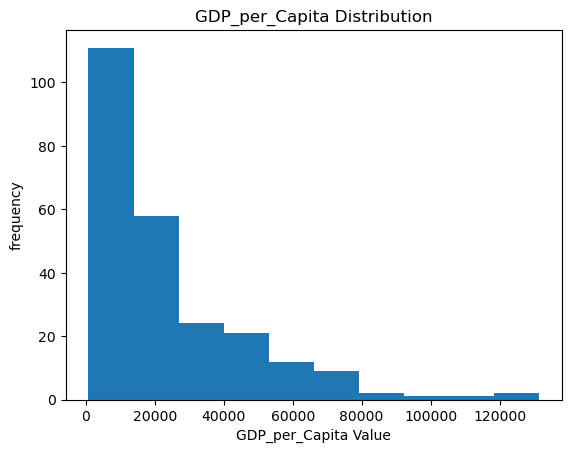

In [22]:
gdp_2021['GDP_per_Capita'].plot(kind='hist')
plt.xlabel('GDP_per_Capita Value')
plt.ylabel('frequency')
plt.title('GDP_per_Capita Distribution')

In [23]:
gdp_2021.value_counts()

Country                                       Year  GDP_per_Capita
Afghanistan                                   2021  1673.964059       1
Least developed countries: UN classification  2021  3352.661742       1
Namibia                                       2021  10161.286578      1
Nauru                                         2021  12126.588746      1
Nepal                                         2021  4252.375175       1
                                                                     ..
Guyana                                        2021  24193.527521      1
Haiti                                         2021  3179.257956       1
Heavily indebted poor countries (HIPC)        2021  2781.359328       1
High income                                   2021  55232.525560      1
Zimbabwe                                      2021  2333.973632       1
Name: count, Length: 241, dtype: int64

## 12. Top/Bottom 5 Countries in Year 2021
The top 5 countries GDP_per_Capita are Luxembourg, Singapore, Ireland, Qatar, Bermuda, respectively. 
The lowest 5 countries GDP_per_capita are Burundi, Central African Republic, Dem. Rep. Condo, Somalia, Niger. 

In [25]:
gdp_df.loc[gdp_df['Year'] == 2021].nlargest(5, columns='GDP_per_Capita')

,Country,Year,GDP_per_Capita
4166,Luxembourg,2021,131511.020155
6123,Singapore,2021,118887.822066
3297,Ireland,2021,106570.398435
5761,Qatar,2021,102469.967574
680,Bermuda,2021,86699.251991


In [26]:
gdp_df.loc[gdp_df['Year'] == 2021].nsmallest(5, columns='GDP_per_Capita')

,Country,Year,GDP_per_Capita
972,Burundi,2021,787.942779
1216,Central African Republic,2021,924.151424
1629,Dem. Rep. Congo,2021,1184.720486
6285,Somalia,2021,1254.340664
5089,Niger,2021,1309.337926


# 13. create gdp_pivoted with years 1990 & 2021

In [28]:
gdp_pivoted = gdp_df.loc[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2021)].pivot_table(index='Country', columns='Year', values='GDP_per_Capita', dropna=True) 
gdp_pivoted.head(5)

Year,1990,2021
Country,,
Afghanistan,NaN,1673.964059
Africa Eastern and Southern,1815.978712,3858.004651
Africa Western and Central,1748.455212,4429.952133
Albania,2549.746801,15532.706056
Algeria,6974.076379,12170.193777


# 14. Create new Percent Chang Column

In [30]:
gdp_pivoted['Percent_Change'] = ((gdp_pivoted.loc[:, 2021] - gdp_pivoted.loc[:, 1990])/(gdp_pivoted.loc[:, 1990]))*100

## 15. Negative % increase in countrys gdp
One country had a negative percent change, United Arab Emirates.

In [32]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2021,Percent_Change
Country,,,
United Arab Emirates,83843.224678,76948.327496,-8.223559


# 16. Country with highest percent change in GDP_per_Capita
The country with the highest percentage is Equatorial Guinea. 

In [34]:
#gdp_pivoted.loc[:, ['Percent_Change']].sort_values(ascending=False)
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,588.162695,16151.325981,2646.064333
China,981.419207,19484.308087,1885.319621
East Asia & Pacific (excluding high income),1457.452848,17010.302388,1067.125401
East Asia & Pacific (IDA & IBRD),1474.778980,17199.271469,1066.227055
Myanmar,412.416766,4449.833898,978.965325
...,...,...,...
Turkmenistan,5377.655859,NaN,NaN
Turks and Caicos Islands,NaN,21803.145403,NaN
Venezuela,9533.132896,NaN,NaN


### 16.1  Countries with 1st & 2nd Highest percentage increase Line Plot
Equatorial Guinea had a faster and more volatile rise in GDP per Capita than China. They've recently experienced a down trend. 

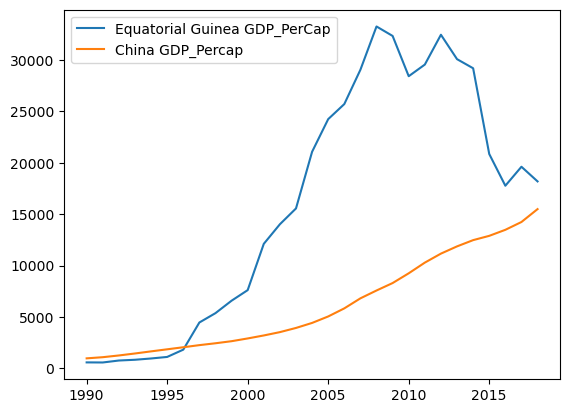

In [36]:
equatorialguinea_GDP_percap = gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].pivot_table(index='Year', columns='Country', values='GDP_per_Capita') # I needed to subset the Equatorial Guinea data and pivot it in order to slice from years 1990:2018.
china_GDP_percap = gdp_df[gdp_df['Country'] == 'China'].pivot_table(index='Year', columns='Country', values='GDP_per_Capita')

equatorialGuinea_GDP_percap_1990to2018 = equatorialguinea_GDP_percap.loc['1990':'2018']
china_GDP_percap_1990to2018 = china_GDP_percap.loc['1990':'2018']
plt.plot(equatorialGuinea_GDP_percap_1990to2018, label='Equatorial Guinea GDP_PerCap')
plt.plot(china_GDP_percap_1990to2018, label='China GDP_Percap')
plt.legend()

## 17. Read in Continents 

In [38]:
continents = pd.read_csv('../data/continents.csv')
continents.head(5)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [39]:
gdp_df.head(5)

,Country,Year,GDP_per_Capita
0,Afghanistan,2021,1673.964059
1,Afghanistan,2020,2078.595086
2,Afghanistan,2019,2168.133765
3,Afghanistan,2018,2110.239384
4,Afghanistan,2017,2096.093111


## 18. Merge Continents and gdp_df keeping only countries that appear in both dataframes

In [41]:
gdp_df = pd.merge(continents, gdp_df, how='inner') #I want to keep only the countries that appear in both dataframes - why I used the inner argument. 

## 19.  Determine the number of Countries per Continent

<Axes: title={'center': 'Number of Countries per Continent'}, xlabel='Continent'>

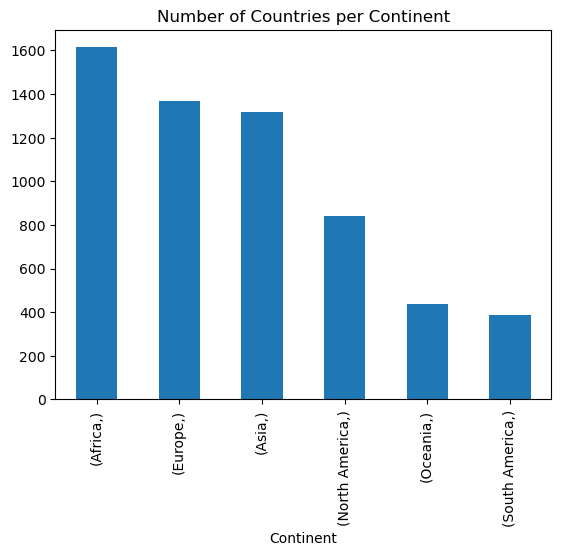

In [43]:
gdp_df[['Continent']].value_counts().plot(kind='bar', title='Number of Countries per Continent') # I want the number of countries per continent

## 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

<Axes: xlabel='Continent', ylabel='GDP_per_Capita'>

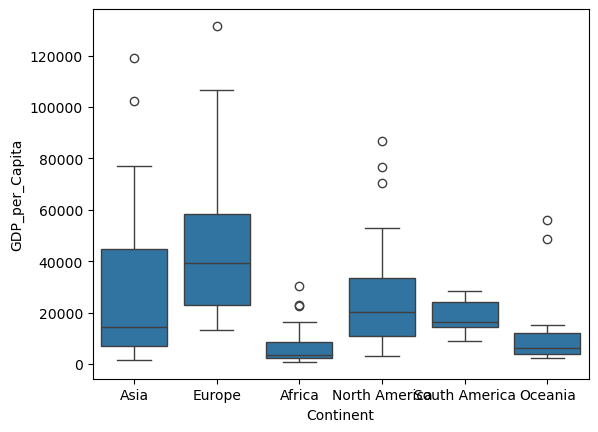

In [45]:
sns.boxplot(x='Continent', y='GDP_per_Capita', data=gdp_df[gdp_df['Year'] == 2021])

## 21 Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.

In [47]:
life_expectancy = pd.read_csv('../data/life_exp.csv', header=2)

## 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [49]:
life_expectancy.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152,64.537,64.752,65.132,65.294,65.502,...,75.683,75.617,75.903,76.072,76.248,75.723,74.626,74.992,NaN,NaN


In [50]:
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,74.992000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,62.899031,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,62.879000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,57.626176,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,61.929000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.485000,61.836000,62.134000,62.440000,62.734000,63.041000,...,78.922000,78.981000,78.783000,78.696000,79.022000,76.567000,76.806000,79.524000,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.678000,34.098000,33.615000,33.247000,34.738000,35.373000,...,65.873000,66.064000,65.957000,64.575000,65.092000,64.650000,63.753000,63.720000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,52.669000,53.085000,53.376000,53.633000,53.906000,54.192000,...,63.950000,64.747000,65.402000,65.674000,66.175000,65.252000,62.341000,61.480000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,49.042000,49.452000,49.794000,50.133000,49.849000,50.563000,...,61.208000,61.794000,62.120000,62.342000,62.793000,62.380000,61.223000,61.803000,NaN,NaN


In [51]:
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name': 'Country', 'variable':'Year', 'value':'Life_Expectancy'})
)

## 23. What was the first country with a life expectancy to exceed 80?
Japan is the first country.

In [53]:
life_expectancy[life_expectancy['Life_Expectancy'] >= 80].sort_values(by='Year', ascending=True)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16576,Gibraltar,2022,82.830000
16581,Greece,2022,80.636585
16588,"Hong Kong SAR, China",2022,83.660976
16550,Denmark,2022,81.304878


## 24.  Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [124]:
life_expectancy = life_expectancy.dropna()
life_expectancy['Year'] = life_expectancy['Year'].astype(int) # I needed to convert life_expectancy df key from dtype: object to match gdp_df key's dtype: int.
gdp_le = pd.merge(
    gdp_df,
    life_expectancy,
    on = ['Year', 'Country']
)
gdp_le.head()

,Continent,Country,Year,GDP_per_Capita,Life_Expectancy
0,Asia,Afghanistan,2021,1673.964059,61.982
1,Asia,Afghanistan,2020,2078.595086,62.575
2,Asia,Afghanistan,2019,2168.133765,63.565
3,Asia,Afghanistan,2018,2110.239384,63.081
4,Asia,Afghanistan,2017,2096.093111,63.016


In [126]:
gdp_le.head()

,Continent,Country,Year,GDP_per_Capita,Life_Expectancy
0,Asia,Afghanistan,2021,1673.964059,61.982
1,Asia,Afghanistan,2020,2078.595086,62.575
2,Asia,Afghanistan,2019,2168.133765,63.565
3,Asia,Afghanistan,2018,2110.239384,63.081
4,Asia,Afghanistan,2017,2096.093111,63.016


## 25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?
31 countries have a life expectancy of at least 80. 

In [192]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == 2021]

In [163]:
gdp_le_2021[gdp_le_2021['Life_Expectancy'] >= 80].value_counts().sum()

31

## 26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [277]:
gdp_le_2021.sort_values(['GDP_per_Capita'], ascending = False)[0:3] # I needed to find the 3 largest 3 GDP_per_Capita countries for 2021.

,Continent,Country,Year,GDP_per_Capita,Life_Expectancy
2876,Europe,Luxembourg,2021,131511.020155,82.597561
4479,Asia,Singapore,2021,118887.822066,83.092683
2304,Europe,Ireland,2021,106570.398435,82.353659


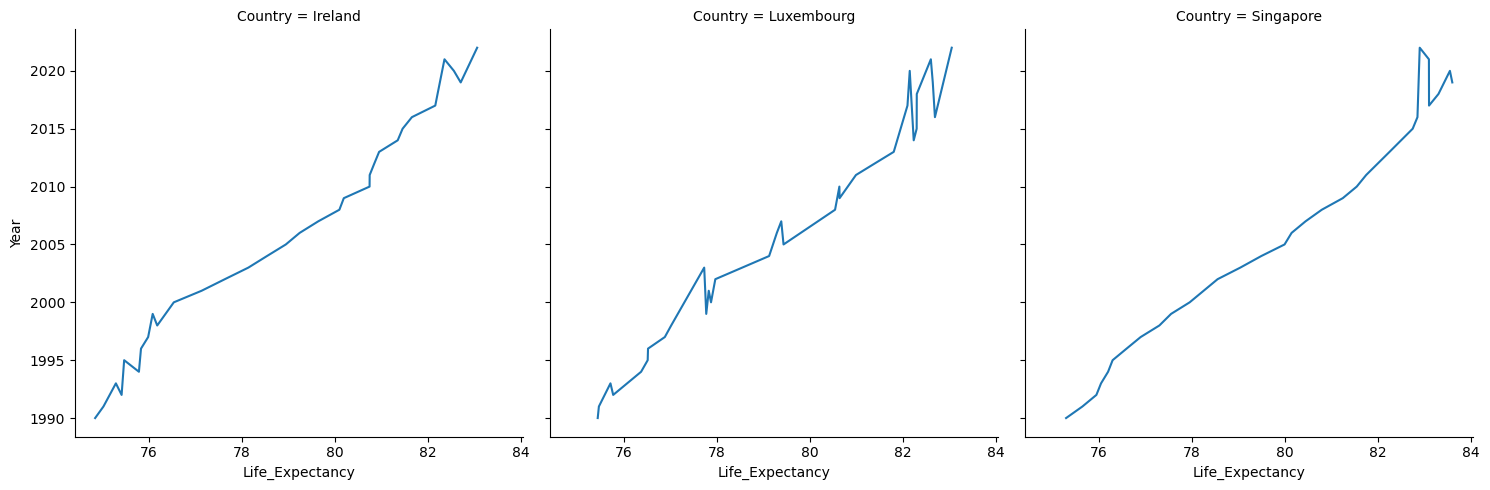

In [287]:
sns.relplot(
    data = gdp_le.loc[(gdp_le['Country'] == 'Luxembourg') | (gdp_le['Country'] == 'Singapore') | (gdp_le['Country'] == 'Ireland')],
    col = 'Country',
    x = 'Life_Expectancy',
    y = 'Year',
    kind = 'line'
)

## 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?
There is a positive correlation between the two variables. As GDP per Capita increases life expectancy does too. 

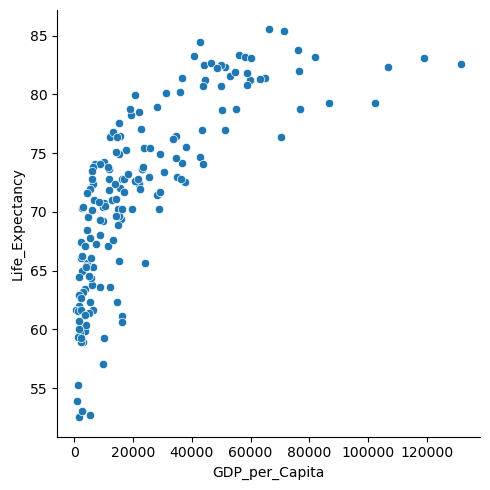

In [315]:
sns.relplot(
    data = gdp_le_2021,
    x = 'GDP_per_Capita',
    y = 'Life_Expectancy',
    kind = 'scatter'
)

## 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?
There is a strong, positive correlation between the two variables. The number ranges between -1 to 1. A positive number represents a direct assocation between the variables (Ex. when one goes up the other goes up and vice versa). A 0 means no correlation between the variables. A negative number represents an indirect association between the variables (Ex. when one goes up the other goes down and vice versa). It is a general rule of thumb that 0 to 0.3 represents a weak association, .3 to .7 represents a medium association, and .7 to 1 represents a strong association. (These numbers aren't exact; it is more or less divided into thirds to describe the strength of the relationship). 

In [321]:
gdp_le_2021[['Life_Expectancy', 'GDP_per_Capita']].corr()

,Life_Expectancy,GDP_per_Capita
Life_Expectancy,1.000000,0.743692
GDP_per_Capita,0.743692,1.000000


## 29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.
There is a positive and even stronger association between life expectancy and GDP_log. 

In [382]:
pd.options.mode.chained_assignment = None  # default='warn' # I had to shut off the stupid warning system so I could compute np.log on my subset.
gdp_le_2021['GDP_log'] = np.log(gdp_le_2021['GDP_per_Capita'])

In [386]:
gdp_le_2021[['Life_Expectancy', 'GDP_log']].corr()

,Life_Expectancy,GDP_log
Life_Expectancy,1.000000,0.846103
GDP_log,0.846103,1.000000


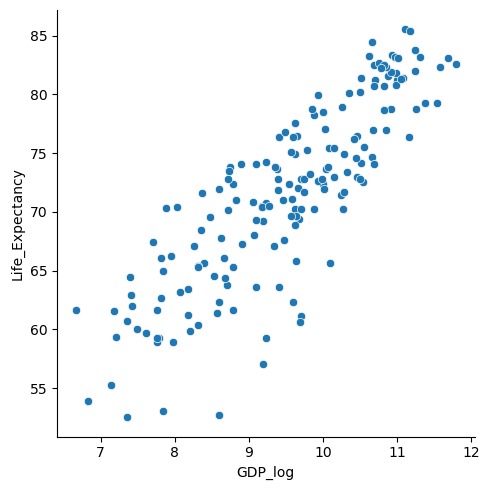

In [392]:
sns.relplot(
    data = gdp_le_2021,
    x = 'GDP_log',
    y = 'Life_Expectancy',
    kind='scatter'
)